In [1]:
#Convolutional Neural Network on MNIST handwritten digit dataset

import numpy as np
import pandas as pd
import tensorflow
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.layers import Convolution2D,MaxPooling2D
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('F:/Social Prachar/Raj sir/july/15 july 2021/train.csv')
data.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


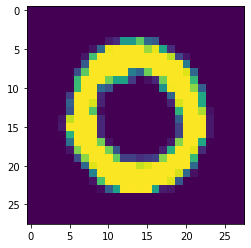

In [3]:
#reshaping into 28X28 array
f = data.iloc[1,1:].values.reshape(28,28)
plt.imshow(f)

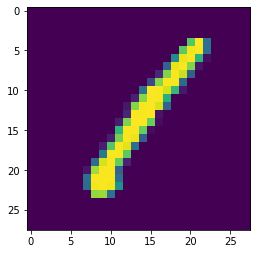

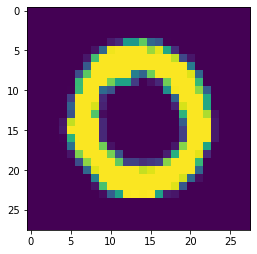

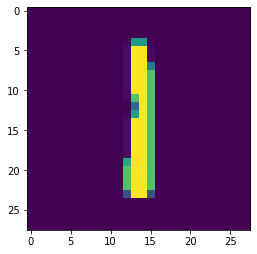

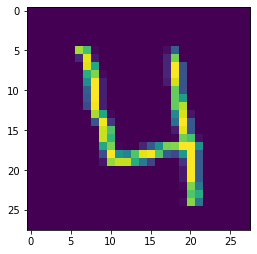

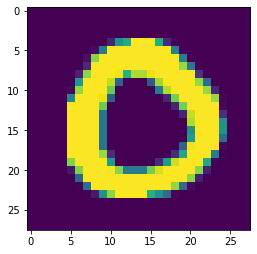

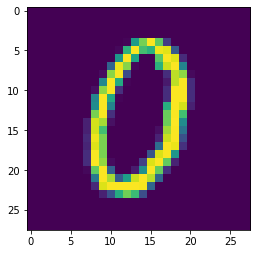

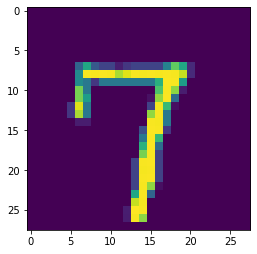

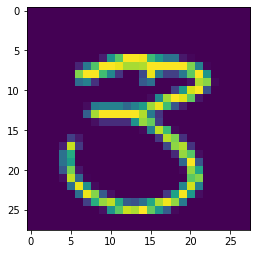

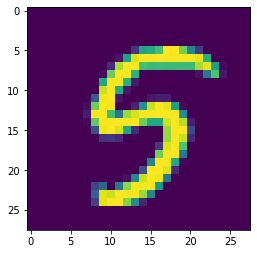

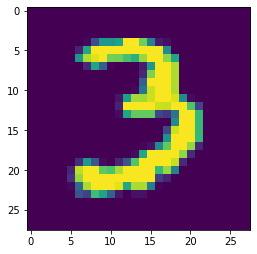

In [4]:
#reshaping into 28X28 array
for i in range (10):
    a=data.iloc[i,1:].values
    a=a.reshape(28,28)
    fig = plt.figure(figsize=(4,5))
    plt.imshow(a)
   
    


In [5]:
#preprocessing data 
#Storing Pixel array in form length width and channel in df_x
df_x = data.iloc[:,1:].values.reshape(len(data),28,28,1).astype('float32') # [x,y] [row,coloumn]

#Storing the labels in y
y = data.iloc[:,0].values

In [6]:
import tensorflow.keras.utils as tfk

In [7]:
df_y = tfk.to_categorical(y, num_classes=10,dtype='int64')

In [8]:
df_x = np.array(df_x) 
df_y = np.array(df_y)

In [9]:
df_x

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [10]:
#lables
df_y

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [11]:
#categorical labels
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [12]:
df_x.shape # 42000 3-D structure of data ,1 is the grey scale colour

(42000, 28, 28, 1)

In [13]:
df_y.shape

(42000, 10)

In [14]:
#test train split

x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.2,random_state=4)


In [15]:
#CNN model
model = Sequential()
# 1st using convolution techique then 32-filter 3-size of filter 
model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(28,28,1)))
# 2nd pooling the img 
model.add(MaxPooling2D(pool_size = (2,2)))
# 3rd flattening 
model.add(Flatten())
# 4th ANN
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('Softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               540900    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation (Activation)      (None, 10)                0

In [17]:
#fitting it with just 100 images for testing 
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5,verbose=2)

Epoch 1/5
1050/1050 - 12s - loss: 2.8719 - accuracy: 0.9052 - val_loss: 0.1577 - val_accuracy: 0.9585
Epoch 2/5
1050/1050 - 10s - loss: 0.1494 - accuracy: 0.9583 - val_loss: 0.1200 - val_accuracy: 0.9674
Epoch 3/5
1050/1050 - 10s - loss: 0.1182 - accuracy: 0.9648 - val_loss: 0.1329 - val_accuracy: 0.9671
Epoch 4/5
1050/1050 - 10s - loss: 0.1084 - accuracy: 0.9674 - val_loss: 0.1165 - val_accuracy: 0.9677
Epoch 5/5
1050/1050 - 10s - loss: 0.1094 - accuracy: 0.9678 - val_loss: 0.1343 - val_accuracy: 0.9687


In [18]:
model.predict(x_test)

array([[9.99995708e-01, 1.07669339e-10, 1.57557270e-06, ...,
        1.82401150e-10, 2.59682315e-06, 5.74079846e-11],
       [4.06955794e-14, 1.25283624e-16, 3.21292874e-15, ...,
        1.91070181e-11, 1.60490328e-13, 1.64643321e-08],
       [9.99996305e-01, 1.95662223e-10, 7.17466619e-08, ...,
        1.85333116e-09, 6.21368679e-10, 3.05569059e-09],
       ...,
       [9.99980688e-01, 4.60432942e-10, 1.16069133e-10, ...,
        1.07525547e-13, 4.04647595e-14, 4.88610107e-12],
       [6.47367165e-17, 4.11830794e-17, 1.36697413e-14, ...,
        9.69389933e-13, 4.13130728e-12, 3.69117741e-13],
       [1.78832593e-07, 9.98130500e-01, 3.19894789e-05, ...,
        1.19290652e-03, 2.33151062e-04, 4.56139242e-05]], dtype=float32)

In [19]:
model.predict_classes(x_test)

C:\Users\ganes\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 4, 0, ..., 0, 3, 1], dtype=int64)

In [20]:
data.iloc[100:105,1:]

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
104,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
data.iloc[50:60:,:1]

,label
50,7
51,5
52,1
53,9
54,0
55,2
56,2
57,3
58,9
59,1


In [22]:
var = data.iloc[50:60:,1:].values.reshape(10,28,28,1).astype('float32')

In [23]:
model.predict_classes(var)

C:\Users\ganes\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([7, 5, 1, 9, 0, 2, 2, 3, 9, 1], dtype=int64)